In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:\Sem 5\projects\ML\main.csv')

# Separate the features and labels
features = data.iloc[:, :-1]
labels = data['label']

# Calculate the intraclass spread (standard deviation within each class)
intraclass_spread = features.groupby(labels).std().mean()

# Calculate the interclass spread (spread between the means of different classes)
class_means = features.groupby(labels).mean()
interclass_spread = class_means.std()

# Output the results
print("Intraclass Spread:")
print(intraclass_spread)

print("\nInterclass Spread:")
print(interclass_spread)



Intraclass Spread:
UMLS:C0457096_yellow sputum            NaN
UMLS:C0425560_cardiovascular finding   NaN
UMLS:C0020440_hypercapnia              NaN
UMLS:C0581912_heavy feeling            NaN
UMLS:C0002416_ambidexterity            NaN
                                        ..
UMLS:C0026827_muscle hypotonia         NaN
UMLS:C0010200_cough                    NaN
UMLS:C0043094_weight gain              NaN
UMLS:C0600142_hot flush                NaN
UMLS:C0312422_blackout                 NaN
Length: 407, dtype: float64

Interclass Spread:
UMLS:C0457096_yellow sputum             0.207588
UMLS:C0425560_cardiovascular finding    0.148497
UMLS:C0020440_hypercapnia               0.148497
UMLS:C0581912_heavy feeling             0.086387
UMLS:C0002416_ambidexterity             0.121709
                                          ...   
UMLS:C0026827_muscle hypotonia          0.121709
UMLS:C0010200_cough                     0.371828
UMLS:C0043094_weight gain               0.170814
UMLS:C0600142_hot f

In [6]:
classes = np.unique(labels)

# Initialize dictionaries to store centroids and spreads
centroids = {}
spreads = {}

# Calculate the mean (centroid) and spread for each class
for cls in classes:
    class_features = features[labels == cls]
    
    # Calculate the mean (centroid) for the class
    centroids[cls] = np.mean(class_features, axis=0)
    
    # Calculate the spread (standard deviation) for the class
    spreads[cls] = np.std(class_features, axis=0)

# Calculate the distance between mean vectors (centroids) of each pair of classes
distances = {}
for i, cls1 in enumerate(classes):
    for cls2 in classes[i+1:]:
        distance = np.linalg.norm(centroids[cls1] - centroids[cls2])
        distances[(cls1, cls2)] = distance

# Output the results
print("Class Centroids (Means):")
for cls, centroid in centroids.items():
    print(f"Class {cls}: {centroid}")

print("\nClass Spreads (Standard Deviations):")
for cls, spread in spreads.items():
    print(f"Class {cls}: {spread}")

print("\nDistances Between Class Centroids:")
for pair, distance in distances.items():
    print(f"Distance between class {pair[0]} and class {pair[1]}: {distance}")


Class Centroids (Means):
Class UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections: UMLS:C0457096_yellow sputum             0.0
UMLS:C0425560_cardiovascular finding    0.0
UMLS:C0020440_hypercapnia               0.0
UMLS:C0581912_heavy feeling             0.0
UMLS:C0002416_ambidexterity             0.0
                                       ... 
UMLS:C0026827_muscle hypotonia          1.0
UMLS:C0010200_cough                     1.0
UMLS:C0043094_weight gain               0.0
UMLS:C0600142_hot flush                 0.0
UMLS:C0312422_blackout                  0.0
Length: 407, dtype: float64
Class UMLS:C0001418_adenocarcinoma: UMLS:C0457096_yellow sputum             0.0
UMLS:C0425560_cardiovascular finding    0.0
UMLS:C0020440_hypercapnia               0.0
UMLS:C0581912_heavy feeling             0.0
UMLS:C0002416_ambidexterity             0.0
                                       ... 
UMLS:C0026827_muscle hypotonia          0.0
UMLS:C0010200_c

Mean of the selected feature: 0.04477611940298507
Variance of the selected feature: 0.042771218534194834


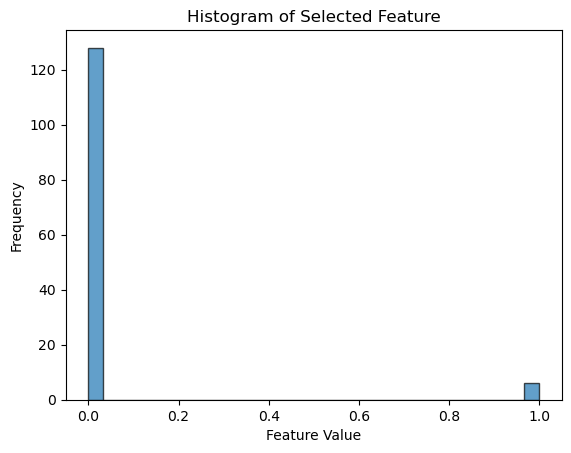

In [10]:
selected_feature = data.iloc[:, 0]  # Change the index to select a different feature
import matplotlib.pyplot as plt
# Calculate the mean and variance of the selected feature
mean = np.mean(selected_feature)
variance = np.var(selected_feature)

# Print the mean and variance
print(f"Mean of the selected feature: {mean}")
print(f"Variance of the selected feature: {variance}")

# Generate and plot the histogram
plt.hist(selected_feature, bins=30, edgecolor='black', alpha=0.7)  # You can adjust the number of bins as needed
plt.title('Histogram of Selected Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

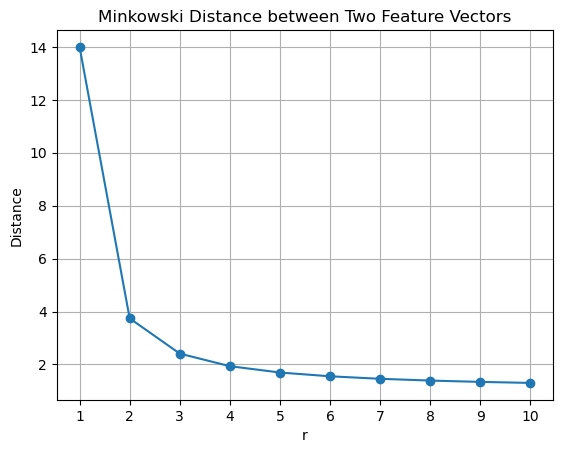

Minkowski distance with r=1: 14.0
Minkowski distance with r=2: 3.7416573867739413
Minkowski distance with r=3: 2.4101422641752297
Minkowski distance with r=4: 1.9343364202676694
Minkowski distance with r=5: 1.6952182030724354
Minkowski distance with r=6: 1.5524632891554087
Minkowski distance with r=7: 1.4579162495762834
Minkowski distance with r=8: 1.390804235062458
Minkowski distance with r=9: 1.3407492401952805
Minkowski distance with r=10: 1.3020054543174677


In [12]:
vector1 = data.iloc[0, :-1].values  # Exclude the label column
vector2 = data.iloc[1, :-1].values  # Exclude the label column

# Function to calculate Minkowski distance
def minkowski_distance(vec1, vec2, r):
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1/r)

# Calculate Minkowski distance for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

# Plot the Minkowski distance as a function of r
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r')
plt.ylabel('Distance')
plt.xticks(r_values)  # Set x-ticks to integers from 1 to 10
plt.grid(True)
plt.show()

# Print the distances for each r value
for r, dist in zip(r_values, distances):
    print(f"Minkowski distance with r={r}: {dist}")

In [16]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values  # All rows, all columns except the last (features)
y = data['label'].values      # All rows, last column (labels)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (93, 407)
X_test shape: (41, 407)
y_train shape: (93,)
y_test shape: (41,)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("D:\Sem 5\projects\ML\main.csv")

# Updated selected classes based on actual labels in the dataset
selected_classes = ['UMLS:C0020538_hypertensive disease', 'UMLS:C0011847_diabetes']

# Filter the data
filtered_data = data[data['label'].isin(selected_classes)]

# Check if filtered_data is empty
if filtered_data.empty:
    raise ValueError("No data found for the selected classes. Please check the classes in the dataset.")

# Inspect the size of filtered_data
print(f"Filtered data contains {filtered_data.shape[0]} samples.")

X = filtered_data.drop(columns=['label'])
y = filtered_data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the number of samples and adjust n_neighbors
n_neighbors = min(1, X_train.shape[0])

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Filtered data contains 2 samples.
Accuracy: 0.00%


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Step 2: Preprocess the data (if necessary)

X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the kNN model
neigh = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
neigh.fit(X_train, y_train)

# Step 5: Evaluate the model using the test set
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy of the kNN model: {accuracy:.2f}")

Accuracy of the kNN model: 0.00


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
file_path="D:\Sem 5\projects\ML\main.csv"
df = pd.read_csv(file_path)
print(df.head())

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (k-NN works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier with k=3 (as an example)
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Perform prediction on a sample test vector
test_vect = X_test[0].reshape(1, -1)  # Selecting the first test vector and reshaping it
predicted_class = neigh.predict(test_vect)

# Output the predicted class
print(f'Predicted class for the test vector: {predicted_class[0]}')

   UMLS:C0457096_yellow sputum  UMLS:C0425560_cardiovascular finding  \
0                            0                                     0   
1                            0                                     0   
2                            0                                     0   
3                            0                                     0   
4                            1                                     0   

   UMLS:C0020440_hypercapnia  UMLS:C0581912_heavy feeling  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   UMLS:C0002416_ambidexterity  UMLS:C0521516_polymyalgia  \
0                            0                          0   
1                            0                          0   
2                

Accuracy for k=1: 0.0000
Accuracy for k=2: 0.0000
Accuracy for k=3: 0.0000
Accuracy for k=4: 0.0000
Accuracy for k=5: 0.0000
Accuracy for k=6: 0.0000
Accuracy for k=7: 0.0000
Accuracy for k=8: 0.0000
Accuracy for k=9: 0.0000
Accuracy for k=10: 0.0000
Accuracy for k=11: 0.0000


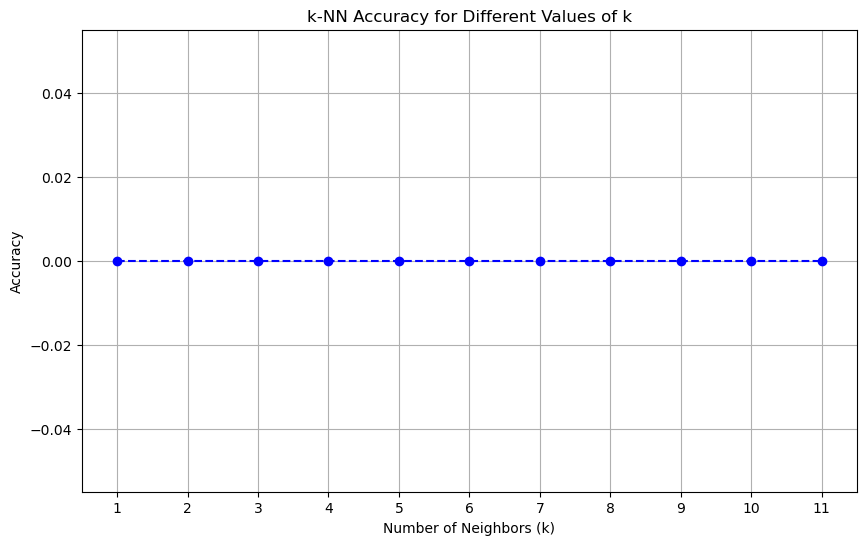

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path =  "D:\Sem 5\projects\ML\main.csv"
df = pd.read_csv(file_path)

# Extracting features and target variables
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List to store accuracies
accuracies = []

# Loop through k values from 1 to 11
for k in range(1, 12):
    # Initialize the k-NN classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    neigh.fit(X_train, y_train)
    
    # Predict the classes for the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')

# Plot the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='--', color='b')
plt.title('k-NN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path =  "D:\Sem 5\projects\ML\main.csv"
df = pd.read_csv(file_path)

# Extracting features and target variables
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
neigh.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion Matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix - Training Data:')
print(conf_matrix_train)

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix - Test Data:')
print(conf_matrix_test)

# Classification Report for training data with zero_division=1 to handle undefined metrics
class_report_train = classification_report(y_train, y_train_pred, zero_division=1)
print('\nClassification Report - Training Data:')
print(class_report_train)

# Classification Report for test data with zero_division=1 to handle undefined metrics
class_report_test = classification_report(y_test, y_test_pred, zero_division=1)
print('\nClassification Report - Test Data:')
print(class_report_test)

Confusion Matrix - Training Data:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Confusion Matrix - Test Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report - Training Data:
                                                                                                  precision    recall  f1-score   support

UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections       1.00      1.00      1.00         1
                                                                    UMLS:C0001418_adenocarcinoma       1.00      1.00      1.00         1
                                                                          UMLS:C0001511_adhesion       1.00      1.00      1.00         1
                                                    UMLS:C0001973_chronic alcoholic intoxication      